<a href="https://colab.research.google.com/github/TreesaKuriakose/nlpnlp/blob/main/NLPdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Sample Dataset:
                                                Text Sentiment
0   @user when a father is dysfunctional and is s...  Negative
1  @user @user thanks for #lyft credit i can't us...  Negative
2                                bihday your majesty  Negative
3  #model   i love u take with u all the time in ...  Negative
4             factsguide: society now    #motivation  Negative


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


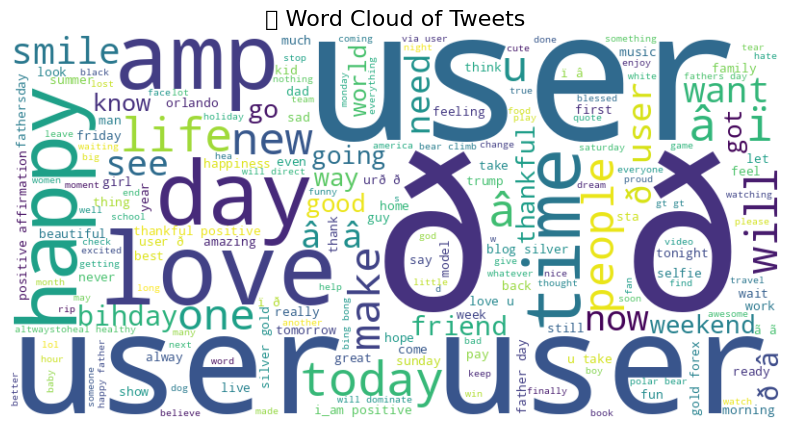


📊 === BoW Model Performance ===
              precision    recall  f1-score   support

    Negative       0.96      0.99      0.98      8905
    Positive       0.83      0.49      0.62       684

    accuracy                           0.96      9589
   macro avg       0.90      0.74      0.80      9589
weighted avg       0.95      0.96      0.95      9589

📊 === TF-IDF Model Performance ===
              precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      8905
    Positive       0.90      0.25      0.39       684

    accuracy                           0.94      9589
   macro avg       0.92      0.62      0.68      9589
weighted avg       0.94      0.94      0.93      9589



In [1]:
# 📌 Step 1: Install wordcloud if not already installed
!pip install wordcloud

# 📌 Step 2: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 📌 Step 3: Load IMDb Dataset (Small sample version)
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)
df = df[['tweet', 'label']]  # label: 0 = Negative, 1 = Positive
df.columns = ['Text', 'Sentiment']
df['Sentiment'] = df['Sentiment'].map({0: 'Negative', 1: 'Positive'})

print("✅ Sample Dataset:")
print(df.head())

# 📌 Step 4: Preprocessing
df.dropna(inplace=True)
df['Text'] = df['Text'].str.lower()

# 📌 Step 5: Generate Word Cloud
text_data = ' '.join(df['Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# 📌 Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔤 Word Cloud of Tweets", fontsize=16)
plt.show()

# 📌 Step 6: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=42)

# 📌 Step 7: Feature Extraction - BoW
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# 📌 Step 8: Feature Extraction - TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 📌 Step 9: Train and Predict - BoW
bow_model = LogisticRegression()
bow_model.fit(X_train_bow, y_train)
y_pred_bow = bow_model.predict(X_test_bow)

# 📌 Step 10: Train and Predict - TF-IDF
tfidf_model = LogisticRegression()
tfidf_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = tfidf_model.predict(X_test_tfidf)

# 📌 Step 11: Compare Results
print("\n📊 === BoW Model Performance ===")
print(classification_report(y_test, y_pred_bow))

print("📊 === TF-IDF Model Performance ===")
print(classification_report(y_test, y_pred_tfidf))

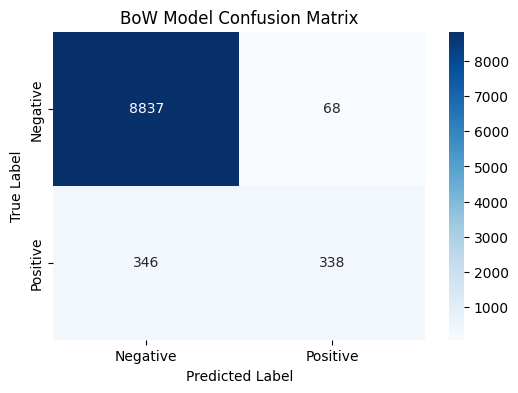

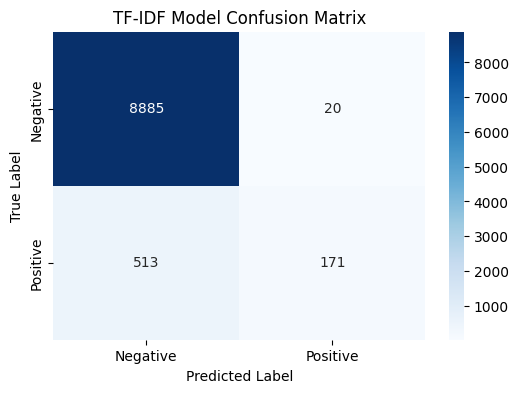

In [3]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# Plot heatmap for BoW
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=bow_model.classes_, yticklabels=bow_model.classes_)
plt.title('BoW Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot heatmap for TF-IDF
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=tfidf_model.classes_, yticklabels=tfidf_model.classes_)
plt.title('TF-IDF Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()